In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from datetime import datetime, timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

#adds folder to the search path for 'import'
sys.path.append('../python-files')
sys.path.append('../broker')  #this is where client.py lives

import client



In [5]:
results = pickle.load(open('results.pkl', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'results.pkl'

In [6]:
ap = results['Apomahon']
print(ap.name)
print(ap.lat)
print(ap.lon)
print(ap.alt)
#print(ap.calendar)
print(ap.busy_time())

NameError: name 'results' is not defined

In [7]:
vu = results['Valparaiso University']
print(vu.name)
print(vu.busy_time())

NameError: name 'results' is not defined

In [8]:
def passlines(ax, y, xstart, xstop, color='b'):
    ax.hlines(y, xstart, xstop, color, lw=4)
    #plt.vlines(xstart, y+0.03, y-0.03, color, lw=2)
    #plt.vlines(xstop, y+0.03, y-0.03, color, lw=2)

In [9]:
x = vu.calendar_begin
z = vu.calendar_end

NameError: name 'vu' is not defined

In [10]:
results['Apomahon'].busy_time()

NameError: name 'results' is not defined

In [3]:
import db
import schedulers
import client

stations = db.load_stations('../python-files/network-stations.json')
satellites = db.load_satellites('../python-files/satellites.json', '../python-files/tle.sqlite')

gs = stations['KB9JHU']
passes = db.getpasses(dbfile='../python-files/allpasses.sqlite', gs=gs['name'], start='2018-06-20', end='2018-06-20 01:00')

c = client.AllClient(gs)
clients = schedulers.random_scheduler(passes=passes, clients={gs['name']:c}, satellites=satellites, debug=True)




**********************

In [43]:
x = c.calendar.begin()
starters = []
enders = []
sats = []
for p in sorted(c.calendar.search(x, x + timedelta(hours=4))):
    starters.append(p.begin)
    enders.append(p.end)
    sats.append(p.data['job']['tle0'])

In [44]:
from datetime import timedelta
oneday = timedelta(days=1)

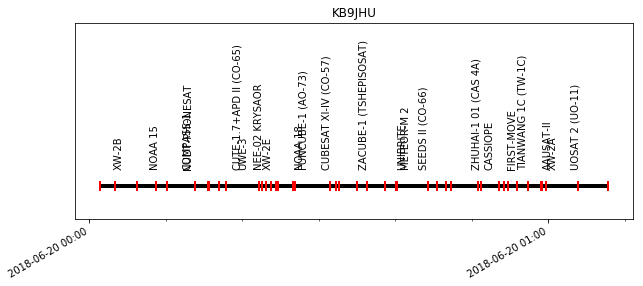

In [45]:
import numpy as np

plt.close('all')
fig = plt.figure(figsize=(10, 4))

ax = plt.gca()
ax.xaxis_date()
ax.set_ylim(0.8,2)
#plt.xlim(x,z)
#plt.xlim(x,x+oneday)


#plt.xlim(x, x + timedelta(hours=4))


ax.hlines(np.ones_like(starters), starters, enders, lw=4)
ax.vlines(starters, 1+0.03, 1-0.03, 'r', lw=2)
ax.vlines(enders, 1+0.03, 1-0.03, 'r', lw=2)
for sat, start, end in zip(sats, starters, enders):
    midpoint = start + (end-start)/2
    ax.text(midpoint, 1.1, sat, rotation=90, ha='center', va='bottom')

ax.xaxis.set_major_locator(mdates.HourLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=range(0, 60, 10)))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
ax.format_xdata = mdates.DateFormatter('%H:%M')

#turn off y numbers
ax.set_yticks([])
fig.autofmt_xdate() #rotates date labels

ax.set_title(c.name)
plt.show()


In [11]:
def std_calendar_plt(client,hours):
    starters = []
    enders = []
    sats = []
    for p in sorted(client.calendar.search(x, x + timedelta(hours=HOURS))):
        starters.append(p.begin)
        enders.append(p.end)
        sats.append(p.data['job']['tle0'])
    plt.close('all')
    fig = plt.figure(figsize=(25, 4))

    ax = plt.gca()
    ax.xaxis_date()
    ax.set_ylim(0.8,2)

    ax.hlines(np.ones_like(starters), starters, enders, lw=4)
    ax.vlines(starters, 1+0.03, 1-0.03, 'r', lw=2)
    ax.vlines(enders, 1+0.03, 1-0.03, 'r', lw=2)
    for sat, start, end in zip(sats, starters, enders):
        midpoint = start + (end-start)/2
        ax.text(midpoint, 1.1, sat, rotation=90, ha='center', va='bottom')

    ax.xaxis.set_major_locator(mdates.HourLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    ax.xaxis.set_minor_locator(mdates.MinuteLocator(byminute=range(0, 60, 10)))

    ax.format_xdata = mdates.DateFormatter('%H:%M')

    #turn off y numbers
    ax.set_yticks([])
    fig.autofmt_xdate() #rotates date labels

    ax.set_title('%s Jobs' % (c))
    plt.show()


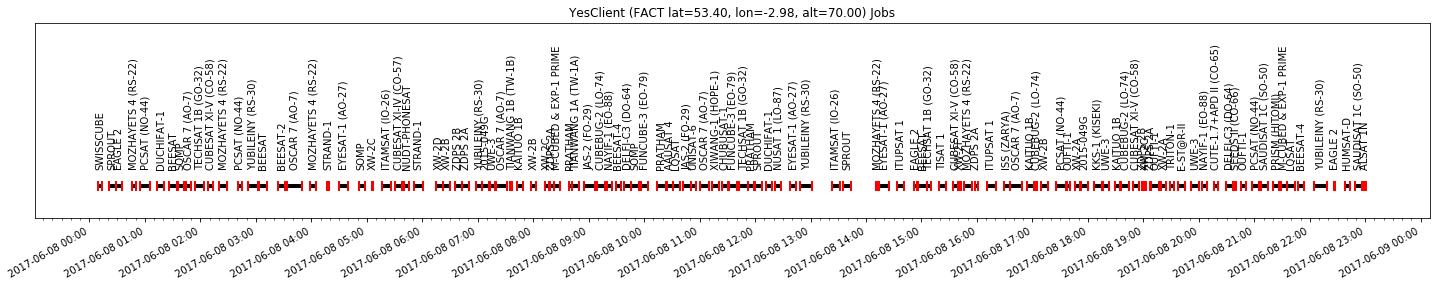

In [12]:
c = results['FACT']
HOURS = 23
std_calendar_plt(c,HOURS)

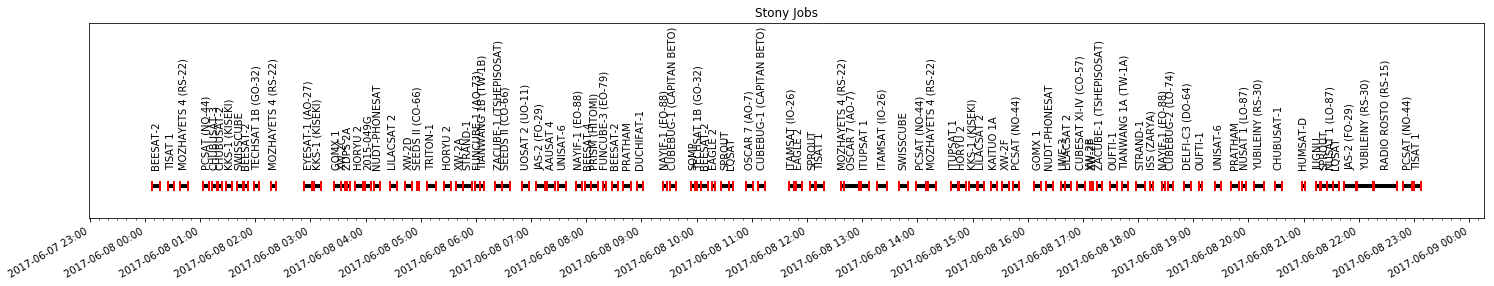

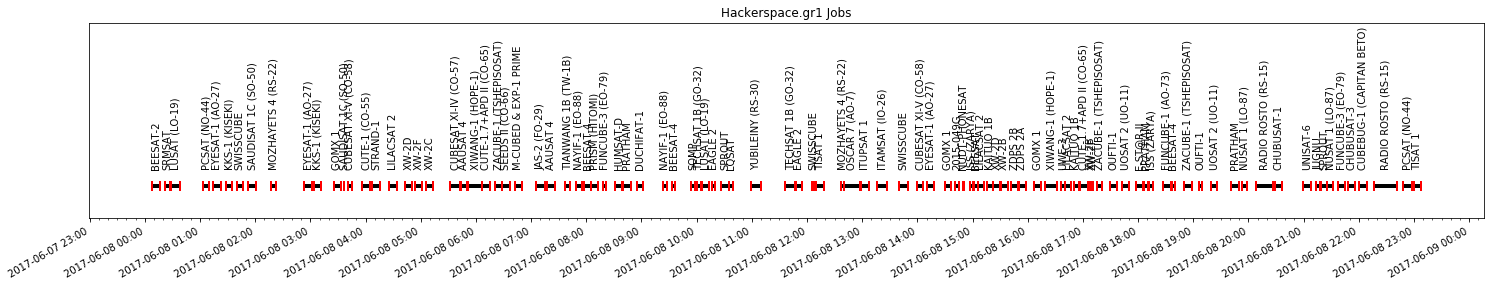

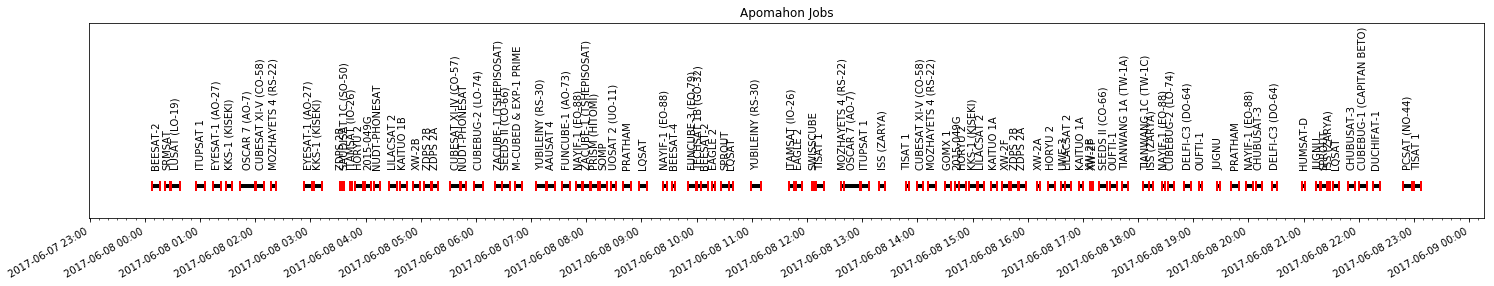

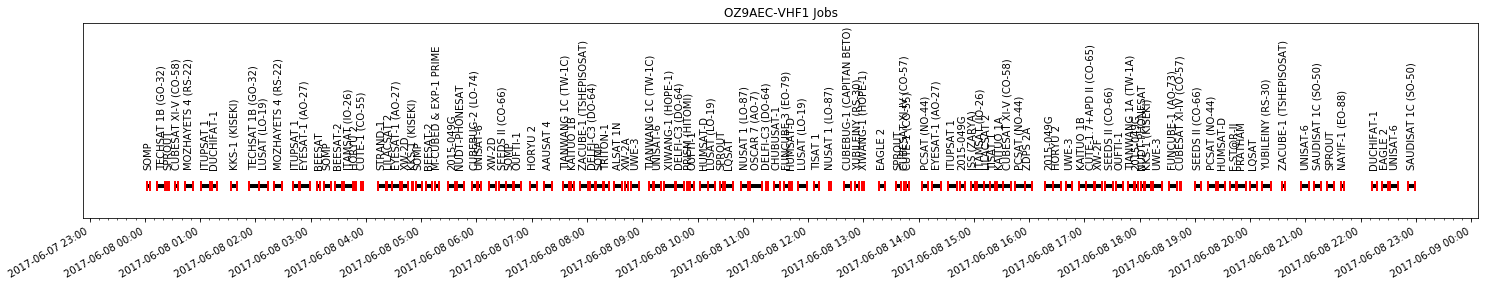

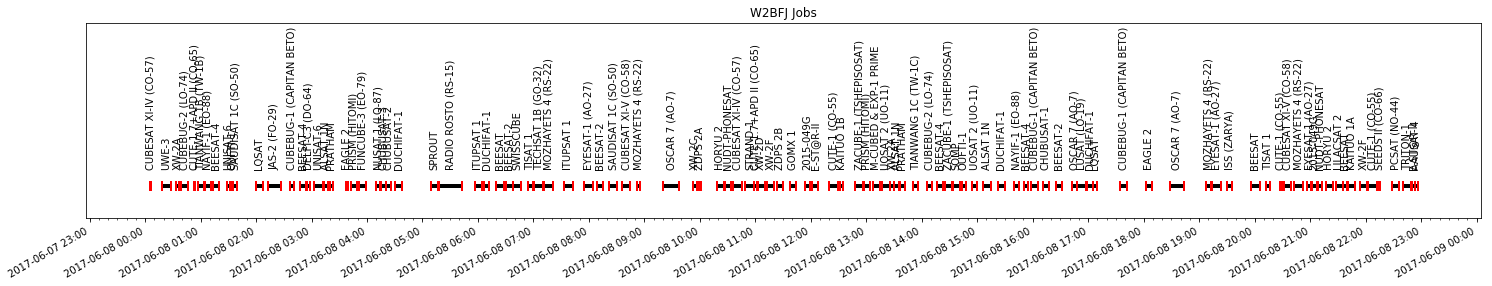

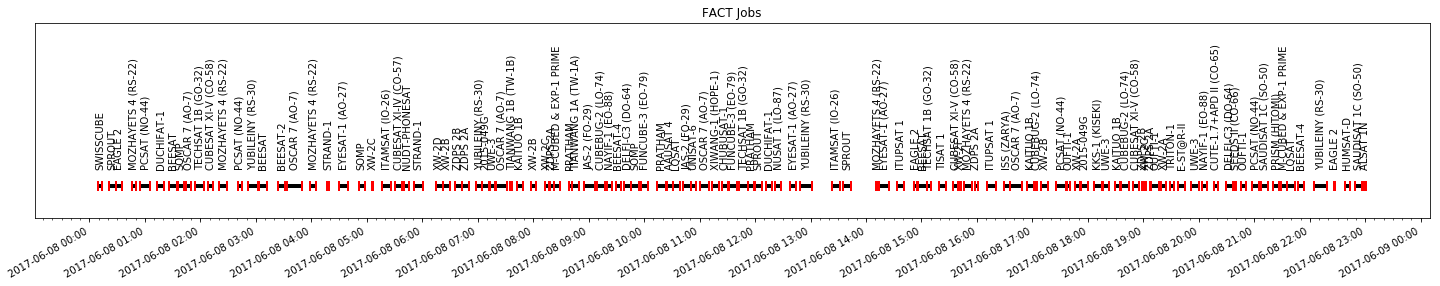

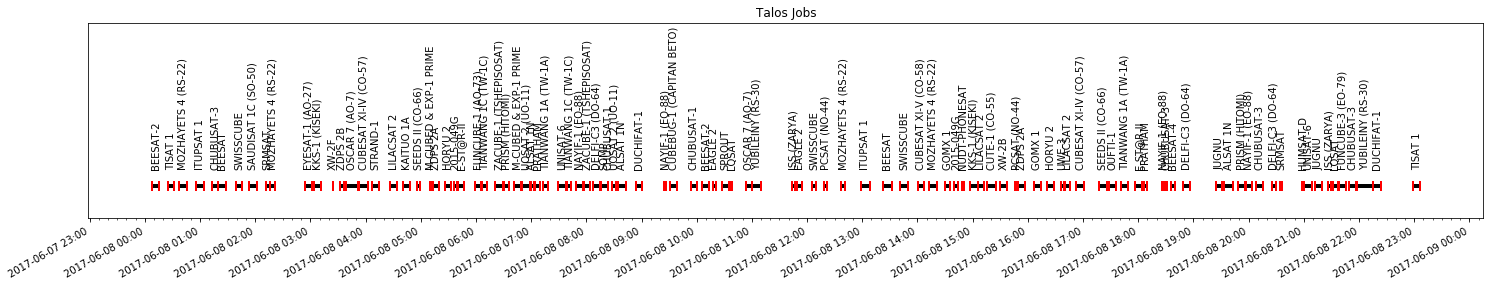

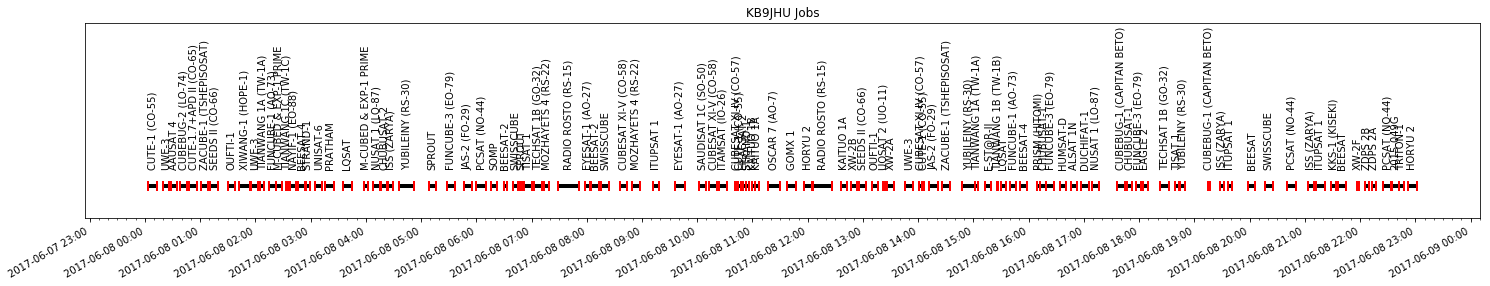

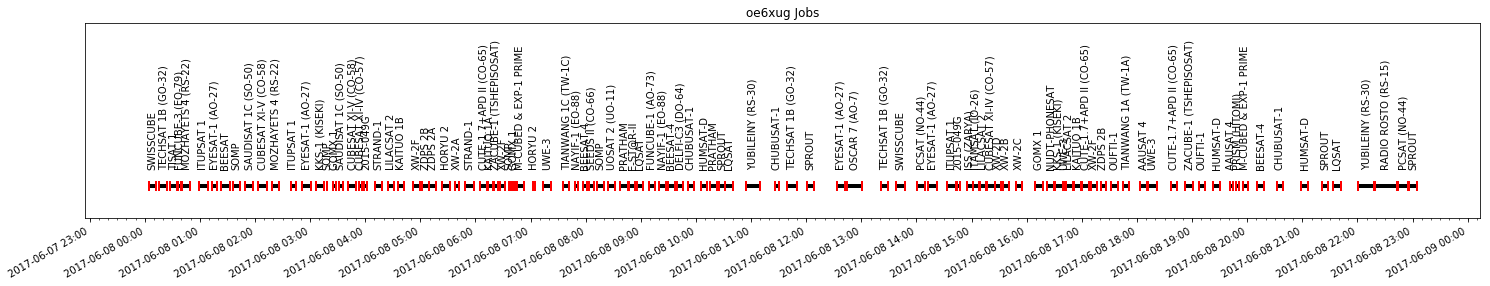

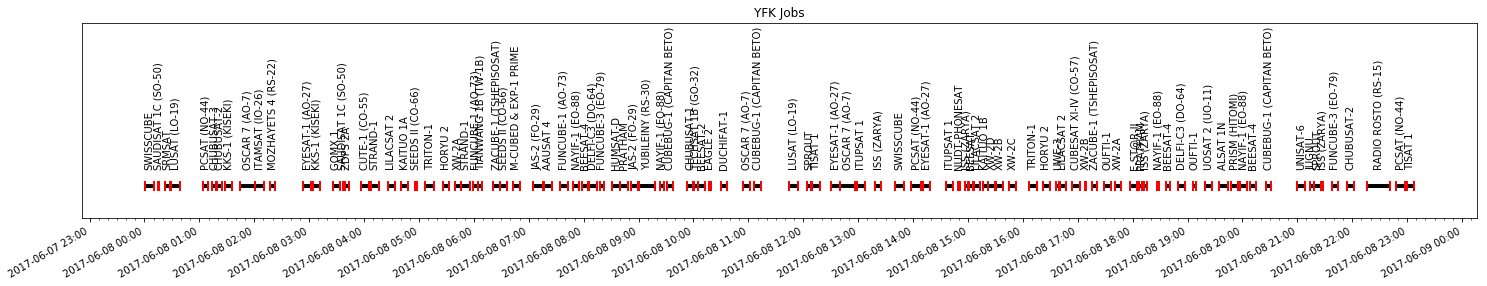

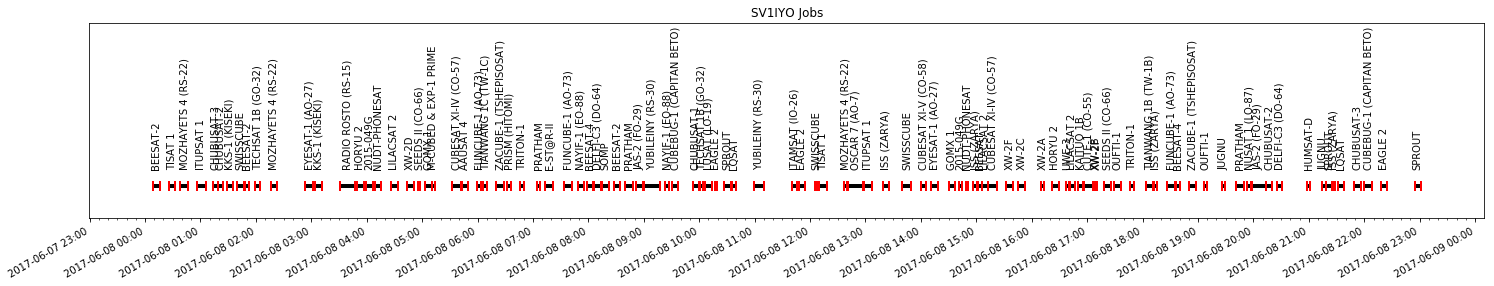

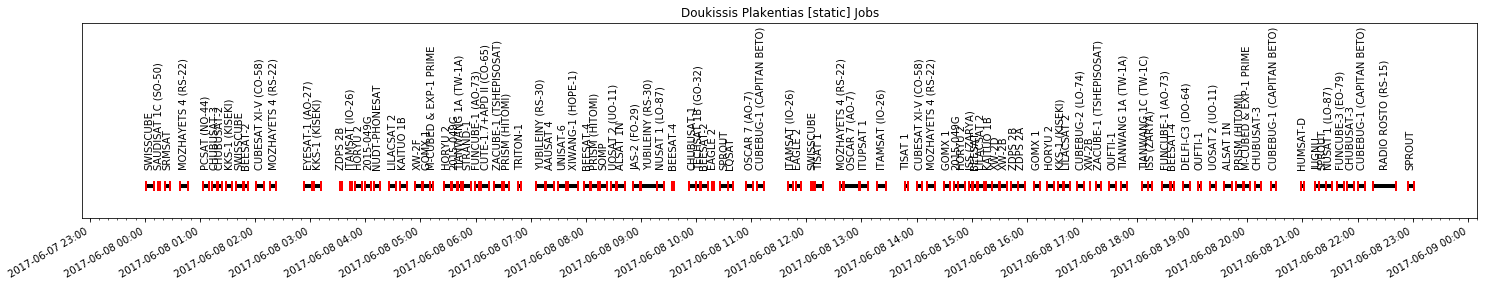

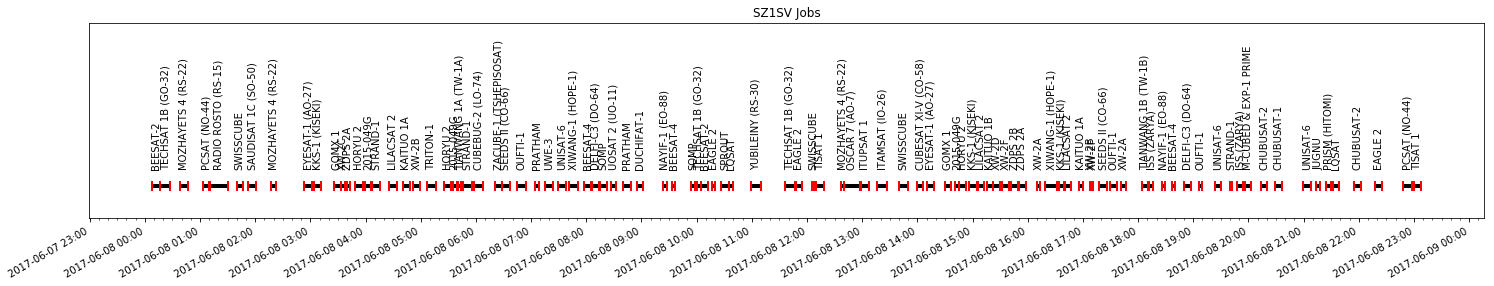

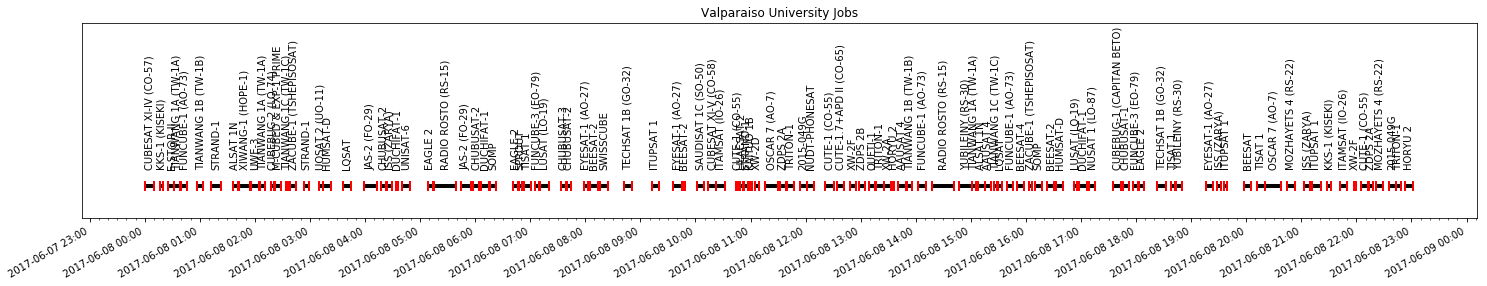

In [13]:
HOURS = 23
for c, value in results.items():
    std_calendar_plt(results[value.name], HOURS)